In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import ntpath
import random

In [27]:
!git clone https://github.com/rslim087a/track

fatal: destination path 'track' already exists and is not an empty directory.


In [28]:

datadir = './track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_382.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_382.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_670.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_670.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_724.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_724.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_792.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_792.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\center_2018_07_16_17_11_43_860.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\left_2018_07_16_17_11_43_860.jpg,D:\Programming\Projects\VisionTransformers-LSTM-Autonomous-Steering\track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


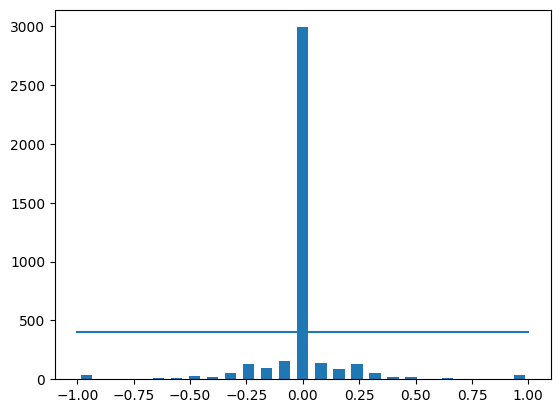

In [29]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [30]:
print('total data:', len(data))
print(data.shape)

total data: 4053
(4053, 7)


In [31]:

remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 2590
remaining: 1463


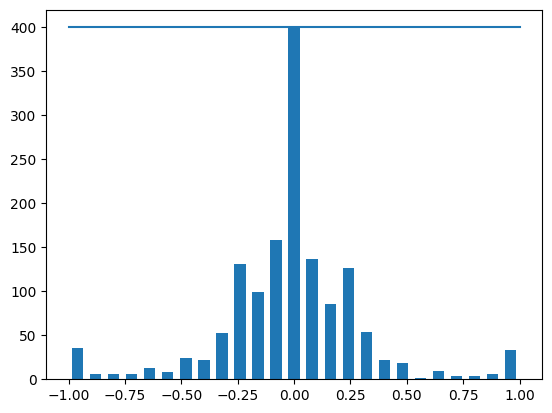

In [32]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [ ]:

def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings